In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
       
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will
#list all files under the input directory

import os
classes = ['feeding_a_horse', 'fixing_a_bike', 'reading', 'applauding', 'holding_an_umbrella', 'washing_dishes', 'phoning', 'playing_violin', 'playing_guitar', 'gardening', 'riding_a_horse', 'writing_on_a_board', 'fixing_a_car', 'walking_the_dog', 'running', 'jumping', 'cutting_vegetables', 'throwing_frisby', 'drinking', 'using_a_computer', 'writing_on_a_book', 'cooking', 'cutting_trees', 'cleaning_the_floor', 'climbing', 'looking_through_a_telescope', 'pouring_liquid', 'watching_TV', 'blowing_bubbles', 'texting_message', 'waving_hands', 'pushing_a_cart', 'fishing', 'smoking', 'rowing_a_boat', 'brushing_teeth', 'shooting_an_arrow', 'riding_a_bike', 'looking_through_a_microscope', 'taking_photos']
classes = classes[:13]
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
from tensorflow import random
import pandas as pd
import os
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
seed =1
np.random.seed(seed)
random.set_seed(seed)
import datetime
import time

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
def makefs(dirs):
    try:
        os.mkdir('test')
    except:
        pass
    try:
        os.mkdir('training')
    except:
        pass
    for cdir in dirs:
        try:
            os.mkdir('test/'+cdir)
        except:
            pass
        try:
            os.mkdir('training/'+cdir)
        except:
            pass
def distribute_files():
    names = os.listdir('Stanford40_JPEGImages/JPEGImages/')
    path = 'Stanford40_JPEGImages/JPEGImages/'
    dirs = []
    print("First_image_name ", names[0], " Length of the files: ",len(names))
    for name in names:
        current = name.split(".")[0][:-4]
        if current not in dirs:
            dirs.append(current)
    print(len(dirs),dirs)
    
    dirs = classes
    makefs(dirs)
    for cdir in dirs:
        index = 0
        for name in names:

            if cdir in name:
                if index > 15:

                    shutil.copy(path+name, 'training/'+cdir+"/"+name)
                else:
                    shutil.copy(path+name, 'test/'+cdir+"/"+name)

                index+=1
distribute_files()

First_image_name  applauding_001.jpg  Length of the files:  9532
40 ['applauding', 'blowing_bubbles', 'brushing_teeth', 'cleaning_the_floor', 'climbing', 'cooking', 'cutting_trees', 'cutting_vegetables', 'drinking', 'feeding_a_horse', 'fishing', 'fixing_a_bike', 'fixing_a_car', 'gardening', 'holding_an_umbrella', 'jumping', 'looking_through_a_microscope', 'looking_through_a_telescope', 'phoning', 'playing_guitar', 'playing_violin', 'pouring_liquid', 'pushing_a_cart', 'reading', 'riding_a_bike', 'riding_a_horse', 'rowing_a_boat', 'running', 'shooting_an_arrow', 'smoking', 'taking_photos', 'texting_message', 'throwing_frisby', 'using_a_computer', 'walking_the_dog', 'washing_dishes', 'watching_TV', 'waving_hands', 'writing_on_a_board', 'writing_on_a_book']


In [35]:
# library imports that can be used.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [2]:

"""
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(40, activation="softmax")(dense2)
model  = Model(inputs=_input, outputs=output)

#color into the one dimensional regular --> data build --


"""

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 1), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, (3, 3), activation ='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2, 2))
#model.add(Conv2D(64, 2, 2, activation =))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2, 2))

#model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
#model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))

#model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(1024, activation = 'relu'))
model.add(Dense(13, activation= 'softmax'))



In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255., 
                                   rotation_range = 180,
                                   fill_mode = 'nearest',
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                   vertical_flip= True,
                                   
                                   
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255.)
training_set = train_datagen.flow_from_directory('training',
                                                target_size = (224, 224),
                                                batch_size =80,
                                                class_mode = 'categorical', color_mode= "grayscale")
test_set = test_datagen.flow_from_directory('test', 
                                           target_size = (224, 224), 
                                           batch_size = 1, 
                                           class_mode = 'categorical', color_mode= "grayscale"
                                           )

Found 3047 images belonging to 13 classes.
Found 208 images belonging to 13 classes.


In [8]:
training_set1 = train_datagen.flow_from_directory('training',
                                                target_size = (224, 224),
                                                batch_size =80,
                                                class_mode = 'categorical', color_mode= "grayscale")
training_set2 = train_datagen.flow_from_directory('training',
                                                target_size = (224, 224),
                                                batch_size =80,
                                                class_mode = 'categorical', color_mode= "grayscale")
training_set3 = train_datagen.flow_from_directory('training',
                                                target_size = (224, 224),
                                                batch_size =80,
                                                class_mode = 'categorical', color_mode= "grayscale")
training_set4 = train_datagen.flow_from_directory('training',
                                                target_size = (224, 224),
                                                batch_size =80,
                                                class_mode = 'categorical', color_mode= "grayscale")

Found 3047 images belonging to 13 classes.
Found 3047 images belonging to 13 classes.
Found 3047 images belonging to 13 classes.
Found 3047 images belonging to 13 classes.


In [9]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
step_epochs= len(training_set)

In [10]:
"""
there are several data pipelining stages to add __ to generate the random data types that can run in the platform --> more diversity--
load on the rest --

"""
def plot_perp(history):
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
    plt.legend()
    plt.show()

Epoch 1/80
39/39 [==============================] - 25s 651ms/step - loss: 2.5582 - accuracy: 0.0840 - val_loss: 2.5597 - val_accuracy: 0.0721
Epoch 2/80
39/39 [==============================] - 27s 686ms/step - loss: 2.5293 - accuracy: 0.1142 - val_loss: 2.5645 - val_accuracy: 0.0817
Epoch 3/80
39/39 [==============================] - 25s 648ms/step - loss: 2.4690 - accuracy: 0.1342 - val_loss: 2.5294 - val_accuracy: 0.1202
Epoch 4/80
39/39 [==============================] - 27s 684ms/step - loss: 2.4032 - accuracy: 0.1638 - val_loss: 2.9182 - val_accuracy: 0.1106
Epoch 5/80
39/39 [==============================] - 25s 630ms/step - loss: 2.3656 - accuracy: 0.1828 - val_loss: 2.4461 - val_accuracy: 0.2019
Epoch 6/80
39/39 [==============================] - 25s 644ms/step - loss: 2.3206 - accuracy: 0.1913 - val_loss: 2.3435 - val_accuracy: 0.2163
Epoch 7/80
39/39 [==============================] - 26s 676ms/step - loss: 2.3092 - accuracy: 0.1930 - val_loss: 3.0159 - val_accuracy: 0.1394

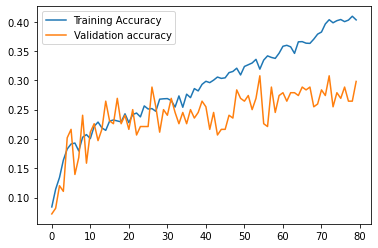

Epoch 1/80
39/39 [==============================] - 27s 686ms/step - loss: 1.7044 - accuracy: 0.4237 - val_loss: 2.5599 - val_accuracy: 0.2933
Epoch 2/80
39/39 [==============================] - 25s 649ms/step - loss: 1.7053 - accuracy: 0.4230 - val_loss: 2.7028 - val_accuracy: 0.2788
Epoch 3/80
39/39 [==============================] - 25s 633ms/step - loss: 1.7075 - accuracy: 0.4227 - val_loss: 2.5167 - val_accuracy: 0.2837
Epoch 4/80
39/39 [==============================] - 26s 674ms/step - loss: 1.6848 - accuracy: 0.4096 - val_loss: 2.7320 - val_accuracy: 0.2596
Epoch 5/80
39/39 [==============================] - 25s 643ms/step - loss: 1.6833 - accuracy: 0.4234 - val_loss: 2.6512 - val_accuracy: 0.2644
Epoch 6/80
39/39 [==============================] - 27s 684ms/step - loss: 1.6822 - accuracy: 0.4224 - val_loss: 2.5895 - val_accuracy: 0.2740
Epoch 7/80
39/39 [==============================] - 25s 634ms/step - loss: 1.6450 - accuracy: 0.4319 - val_loss: 2.5411 - val_accuracy: 0.2692

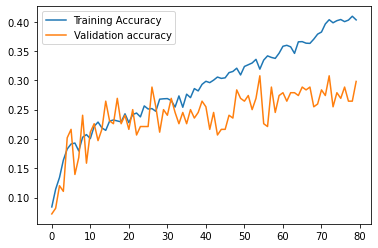

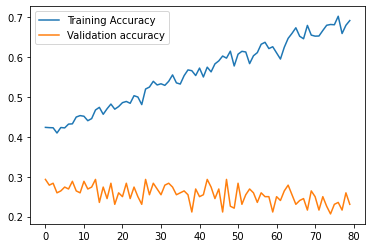

Epoch 1/80
39/39 [==============================] - 24s 606ms/step - loss: 0.8981 - accuracy: 0.6876 - val_loss: 4.9302 - val_accuracy: 0.2212
Epoch 2/80
39/39 [==============================] - 24s 616ms/step - loss: 0.9027 - accuracy: 0.6882 - val_loss: 4.6600 - val_accuracy: 0.2308
Epoch 3/80
39/39 [==============================] - 24s 607ms/step - loss: 0.8162 - accuracy: 0.7260 - val_loss: 4.8301 - val_accuracy: 0.2260
Epoch 4/80
39/39 [==============================] - 25s 636ms/step - loss: 0.8719 - accuracy: 0.7007 - val_loss: 4.7678 - val_accuracy: 0.2019
Epoch 5/80
39/39 [==============================] - 23s 597ms/step - loss: 0.8203 - accuracy: 0.7125 - val_loss: 4.4955 - val_accuracy: 0.2452
Epoch 6/80
39/39 [==============================] - 25s 635ms/step - loss: 0.9092 - accuracy: 0.6734 - val_loss: 4.6891 - val_accuracy: 0.2452
Epoch 7/80
39/39 [==============================] - 24s 613ms/step - loss: 0.8554 - accuracy: 0.7010 - val_loss: 4.6086 - val_accuracy: 0.2404

In [ ]:
all_history = []
stage = 0
for current_train  in [training_set, training_set1, training_set2, training_set3, training_set4]:
    history = model.fit_generator(current_train, steps_per_epoch = step_epochs, validation_data= test_set, validation_steps= len(test_set),epochs = 80, shuffle = False)
    all_history.append(history)
    for  history in all_history:
        plot_perp(history)
    model.save_weights('current_model_40_class_and_single_test_batch_'+str(stage)+'.h5')
    stage+=1
    #all_history.append(history)

In [ ]:
stage = 0

for  history in all_history:
    print("Stage: ", stage)
    plot_perp(history)

In [ ]:
model.save_weights('current_model_40_class_and_single_test_batch_EVE.h5')

In [ ]:
training_set[0][0][0].shape

In [ ]:
plt.imshow(np.reshape(training_set[0][0][0], (224, 224)))
plt.show()
plt.imshow(np.reshape(training_set1[0][0][0], (224, 224)))
plt.show()
plt.imshow(np.reshape(training_set2[0][0][0], (224, 224)))
plt.show()
plt.imshow(np.reshape(training_set3[0][0][0], (224, 224)))
plt.show()
plt.imshow(np.reshape(training_set4[0][0][0], (224, 224)))
plt.show()

In [ ]:
training_set1[0][0][0].shape

In [ ]:
training_set2[0][0][0].shape

In [4]:
model.load_weights("current_model_13_class_and_single_test_batch.h5")

In [7]:
model.weights[0].shape

TensorShape([3, 3, 1, 16])

In [10]:
for i in range(len(model.weights)):
    print(model.weights[i].shape)

(3, 3, 1, 16)
(16,)
(3, 3, 16, 16)
(16,)
(3, 3, 16, 32)
(32,)
(3, 3, 32, 32)
(32,)
(3, 3, 32, 64)
(64,)
(3, 3, 64, 64)
(64,)
(50176, 256)
(256,)
(256, 256)
(256,)
(256, 13)
(13,)


In [20]:
#plt.imshow(model.weights[0][0])

In [16]:
import matplotlib.pyplot as plt

In [19]:
#first_layer_activation = model[0]
#print(first_layer_activation.shape)
#plt.matshow(first_layer_activation[0, :, :, 95], cmap='viridis')
# there are some basic loads that is 

In [28]:
model.layers[0].get_weights()[0] # what is prior or important for the for the perofmance  metrics -->

(3, 3, 1, 16)

In [31]:
import keras

In [32]:
training = tf.keras.preprocessing.image_dataset_from_directory("training", 
                                                   labels = "inferred", 
                                                   label_mode = "int", 
                                                   color_mode = "grayscale",
                                                   batch_size = 80, 
                                                   image_size = (224, 224),
                                                   shuffle = True, 
                                                   seed = None, 
                                                   interpolation="bilinear")

Found 3047 files belonging to 13 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(96, (11, 11), strides = (4, 4), input = ""))